In [1]:
import os
import time
import torch
import shutil
import warnings
import argparse
import importlib
import scanpy as sc

import pandas as pd
import numpy as mp

from CAMEX.base import Dataset
from CAMEX.trainer import Trainer

warnings.filterwarnings("ignore")

C:\Users\10360\anaconda3\envs\camex\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from params import PARAMS

In [3]:
t1 = time.time()

# make log dirs

In [4]:
time_start = time.strftime("%Y-%m-%d-%H-%M-%S")
log_path = f'./log/{time_start}/'
for k, v in PARAMS.items():
    v['time_start'] = time_start
    v['log_path'] = log_path
print(log_path)

./log/2024-04-12-16-58-15/


In [5]:
os.makedirs(log_path, exist_ok=True)
shutil.copy('params.py', log_path + 'params_current.py')
print(f'time: {time_start}')

time: 2024-04-12-16-58-15


# preprocess

In [6]:
#  —————————————————————————————————— 1 preprocess
print('start preprocess')
dataset = Dataset(**PARAMS['preprocess'])
adata_CAMEX = dataset.adata_whole
dgl_data = dataset.dgl_data

start preprocess
            raw-all-human-Margarida: reference  raw-all-macaque-Margarida: query  raw-all-mouse-Margarida: query  raw-all-rat-Margarida: query  raw-all-rabbit-Margarida: query  raw-all-opossum-Margarida: query  raw-all-chicken-Margarida: query
Cerebellum                                  58                              16.0                              43                            53                               45                                42                                36
Brain                                       53                              26.0                              55                            65                               57                                42                                36
Liver                                       49                              34.0                              57                            60                               55                                43                                36
Heart  

# integration

In [7]:
print('start train')
trainer = Trainer(adata_CAMEX, dgl_data, **PARAMS['train'])

start train


In [8]:
trainer.integration()

--------------------------------------------- integration ---------------------------------------------
epoch: 0, loss: 4607.58544921875
epoch: 1, loss: 2490.171142578125
epoch: 2, loss: 1467.8280029296875
epoch: 3, loss: 954.9205932617188
epoch: 4, loss: 640.1492309570312
epoch: 5, loss: 433.93695068359375
epoch: 6, loss: 300.9430847167969
epoch: 7, loss: 214.95994567871094
epoch: 8, loss: 159.0083770751953
epoch: 9, loss: 121.76605224609375
epoch: 10, loss: 98.37760162353516
epoch: 11, loss: 82.01410675048828
epoch: 12, loss: 73.05314636230469
epoch: 13, loss: 66.70439910888672
epoch: 14, loss: 63.745574951171875
epoch: 15, loss: 62.407020568847656
epoch: 16, loss: 60.99980926513672
epoch: 17, loss: 60.73827362060547
epoch: 18, loss: 60.06874465942383
epoch: 19, loss: 59.088157653808594
epoch: 20, loss: 59.054168701171875
epoch: 21, loss: 59.44342041015625
epoch: 22, loss: 58.84150695800781
epoch: 23, loss: 58.24412536621094
epoch: 24, loss: 58.91285705566406
epoch: 25, loss: 58.6582

In [18]:
adata_CAMEX.write_h5ad(log_path + 'adata_CAMEX.h5ad', compression='gzip')

In [16]:
t2 = time.time()

In [17]:
print(f'time usage: {round(t2-t1)} seconds')

time usage: 214 seconds


In [17]:
print(f'time usage: {round(t2-t1)} seconds')

time usage: 214 seconds


# analysis

In [10]:
log_path

'./log/2024-04-12-16-58-15/'

In [11]:
adata_CAMEX = sc.read_h5ad(log_path + 'adata_CAMEX.h5ad')
adata_CAMEX

AnnData object with n_obs × n_vars = 1890 × 2000
    obs: 'meta', 'tissue', 'cell_ontology_class', 'stage', 'sample', 'major_stage', 'batch', 'n_genes_by_counts', 'total_counts', 'cell_ontology_class_num', 'cell_class', 'cell_class_num'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'cell_type', 'data_order', 'dataset_description', 'dataset_type', 'hvg', 'log1p', 'neighbors', 'pca'
    obsm: 'X_CAMEX_Integration', 'X_pca'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [12]:
adata_CAMEX.obsm['X_CAMEX_Integration'].shape

(1890, 128)

In [13]:
sc.pp.neighbors(adata_CAMEX, use_rep='X_CAMEX_Integration')

In [14]:
sc.tl.umap(adata_CAMEX)

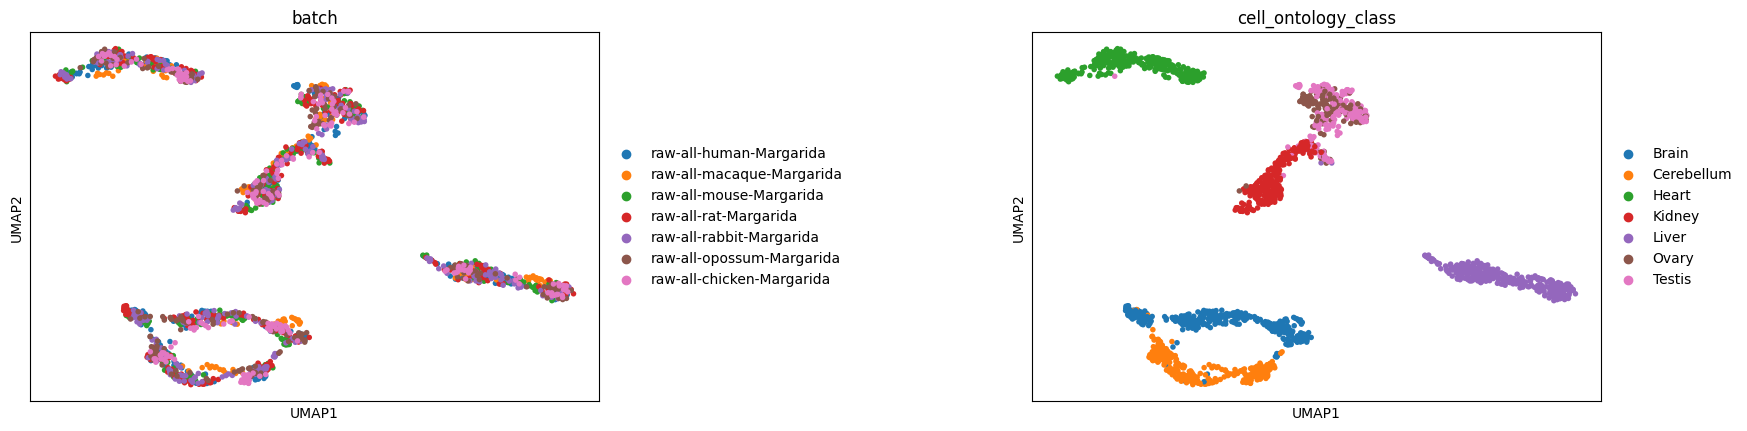

In [15]:
sc.pl.umap(adata_CAMEX, color=['batch', 'cell_ontology_class'], wspace=0.6)